True Label: 2, Predicted Label: 2
True Label: 0, Predicted Label: 0
True Label: 1, Predicted Label: 1
True Label: 1, Predicted Label: 1
True Label: 1, Predicted Label: 1
True Label: 2, Predicted Label: 2
True Label: 2, Predicted Label: 2
True Label: 2, Predicted Label: 2
True Label: 1, Predicted Label: 1
True Label: 1, Predicted Label: 1
True Label: 2, Predicted Label: 2
True Label: 2, Predicted Label: 2
True Label: 0, Predicted Label: 0
True Label: 1, Predicted Label: 1
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 2, Predicted Label: 2
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 1, Predicted Label: 1
True Label: 0, Predicted Label: 0
True Label: 1, Predicted Label: 1
True Label: 0, Predicted Label: 0
True Label: 1, Predicted Label: 1
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 1, Predicted Label: 1
True Label: 2, Predicted Label: 2
True Label: 1,

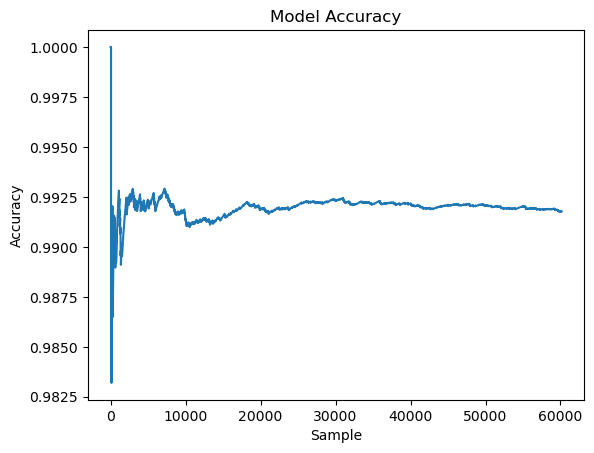

In [7]:
# 0 1 2 테스트
import pandas as pd
import matplotlib.pyplot as plt
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# gpu 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# 저장된 모델과 토크나이저 불러오기
model = AutoModelForSequenceClassification.from_pretrained("./saved_model")
tokenizer = AutoTokenizer.from_pretrained("./saved_model")

model.to(device)

def sentence_predict(sent):
    model.eval()
    tokenized_sent = tokenizer(
        [sent],
        return_tensors="pt",
        max_length=128,
        padding=True,
        truncation=True,
        add_special_tokens=True,
    )
    tokenized_sent = {k: v.to(device) for k, v in tokenized_sent.items()}
    with torch.no_grad():
        outputs = model(
            input_ids=tokenized_sent["input_ids"],
            attention_mask=tokenized_sent["attention_mask"],
        )
    logits = outputs[0]
    logits = logits.detach().cpu()
    result = logits.argmax(-1).numpy()[0]
    return result

# 데이터 로드 및 샘플링
data = pd.read_csv("Data/TFTest.tsv", sep='\t')
#sampled_data = data.sample(n=1000)

# 정확도 계산을 위한 변수 초기화
correct_predictions = 0
accuracy_list = []

# 관리할 샘플 인덱스 초기화
sample_index = 0

for index, row in data.iterrows():
    sentence = row['document']
    true_label = row['label']
    predicted_label = sentence_predict(sentence)
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    if true_label == predicted_label:
        correct_predictions += 1
    # 현재까지의 정확도를 리스트에 추가
    sample_index += 1
    accuracy_list.append(correct_predictions / sample_index)

accuracy = correct_predictions / len(data)
print(f"정확도: {accuracy * 100:.2f}%")

# 정확도 그래프 그리기
plt.plot(accuracy_list)
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Sample")
plt.savefig("accuracy_plot.png")
plt.show()

True Label: 1, Predicted Label: 1
True Label: 2, Predicted Label: 2
True Label: 0, Predicted Label: 0
True Label: 5, Predicted Label: 5
True Label: 2, Predicted Label: 2
True Label: 5, Predicted Label: 5
True Label: 6, Predicted Label: 6
True Label: 3, Predicted Label: 3
True Label: 2, Predicted Label: 2
True Label: 6, Predicted Label: 6
True Label: 2, Predicted Label: 2
True Label: 0, Predicted Label: 0
True Label: 2, Predicted Label: 2
True Label: 0, Predicted Label: 0
True Label: 3, Predicted Label: 3
True Label: 2, Predicted Label: 2
True Label: 1, Predicted Label: 4
True Label: 2, Predicted Label: 2
True Label: 5, Predicted Label: 5
True Label: 3, Predicted Label: 3
True Label: 6, Predicted Label: 6
True Label: 5, Predicted Label: 5
True Label: 6, Predicted Label: 6
True Label: 3, Predicted Label: 3
True Label: 3, Predicted Label: 3
True Label: 3, Predicted Label: 3
True Label: 1, Predicted Label: 4
True Label: 2, Predicted Label: 6
True Label: 6, Predicted Label: 6
True Label: 3,

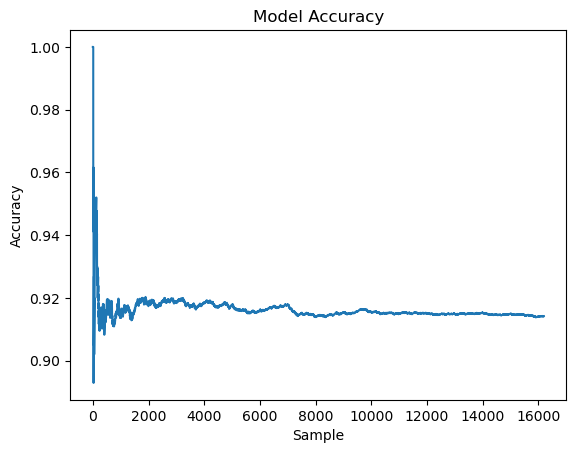

In [6]:
# 세부 감정
import pandas as pd
import matplotlib.pyplot as plt
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# gpu 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 저장된 모델과 토크나이저 불러오기
model = AutoModelForSequenceClassification.from_pretrained("./saved_model")
tokenizer = AutoTokenizer.from_pretrained("./saved_model")
model.to(device)

def sentence_predict(sent):
    model.eval()
    tokenized_sent = tokenizer(
        [sent],
        return_tensors="pt",
        max_length=128,
        padding=True,
        truncation=True,
        add_special_tokens=True,
    )
    tokenized_sent = {k: v.to(device) for k, v in tokenized_sent.items()}
    with torch.no_grad():
        outputs = model(
            input_ids=tokenized_sent["input_ids"],
            attention_mask=tokenized_sent["attention_mask"],
        )
    logits = outputs[0]
    logits = logits.detach().cpu()
    result = logits.argmax(-1).numpy()[0]
    return result

# 데이터 로드 및 샘플링
data = pd.read_csv("Data/emotionTest.csv")
#sampled_data = data.sample(n=1000)

# 정확도 계산을 위한 변수 초기화
correct_predictions = 0
accuracy_list = []

# 관리할 샘플 인덱스 초기화
sample_index = 0

for index, row in data.iterrows():
    sentence = row['발화문']
    true_label = row['상황']
    predicted_label = sentence_predict(sentence)
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    if true_label == predicted_label:
        correct_predictions += 1
    # 현재까지의 정확도를 리스트에 추가
    sample_index += 1
    accuracy_list.append(correct_predictions / sample_index)

accuracy = correct_predictions / len(data)
print(f"정확도: {accuracy * 100:.2f}%")

# 정확도 그래프 그리기
plt.plot(accuracy_list)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Sample')
plt.savefig('accuracy_graph.png')  # 그래프를 파일로 저장
plt.show()  # 그래프를 화면에 표시
